# Project – Machine Learning-I (CSE 602)

# dataset_2 (African Country Recession Dataset (2000 to 2017)
#Alogorithm 1 used
#SMOTE
#LogisticRegression
#GridSearchCV
#KNN
#RandomForest
#CV
#ANN

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#importing dataset
df = pd.read_csv("africa_recession.csv")
df

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,...,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,4.265433e+05,0.009374,0.648979,0.626111,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,8.046022e+05,0.019658,0.719390,0.657543,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,6.707259e+04,0.001670,0.308652,0.292607,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5.790397e+03,0.000184,0.205865,0.234643,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,1.690724e+04,0.000431,0.959765,0.993985,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,12.208407,6.215000,0.509075,1.837961,21853.750000,26727.062500,5.534759e+04,0.000896,0.234562,0.248461,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
482,29.784193,15.389316,0.516694,1.467321,94663.101560,138279.359400,1.080252e+06,0.016209,0.337927,0.287038,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,1
483,55.797787,25.301973,0.453458,1.689919,102405.859400,137377.593800,7.739462e+05,0.009984,0.259968,0.248847,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
484,15.850567,5.277823,0.332974,1.579579,42087.269530,55202.140630,1.829390e+05,0.002542,0.470906,0.491789,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0


In [4]:
df.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,...,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,20.185755,7.121089,0.357865,1.777389,64361.006942,80885.988722,2.442244e+05,0.004583,0.454419,0.453431,...,221.326667,1009.445556,0.044535,0.030346,0.082411,0.058144,0.024774,0.033930,0.023741,0.078189
std,30.037490,9.921471,0.080541,0.446339,129634.856793,156740.416624,4.725163e+05,0.008210,0.206562,0.203056,...,49.803981,140.125951,0.184025,0.105616,0.288454,0.151285,0.129924,0.127101,0.076937,0.268746
min,1.061468,0.243000,0.198212,1.069451,2781.259277,2984.366943,5.790397e+03,0.000124,0.098622,0.107790,...,149.370000,843.660000,-0.359446,-0.173741,-0.477017,-0.157564,-0.174550,-0.225998,-0.113858,0.000000
25%,3.830730,1.048750,0.297922,1.445886,9117.209716,11081.697755,2.429231e+04,0.000514,0.301179,0.295615,...,185.770000,899.190000,-0.058931,-0.044322,-0.102940,-0.053405,-0.060792,-0.026451,-0.020995,0.000000
50%,10.868272,4.184000,0.368841,1.689902,17471.495120,22228.022460,6.432356e+04,0.001355,0.400647,0.405870,...,213.095000,948.745000,0.061860,0.019950,0.054933,0.046808,0.003277,0.038444,0.006529,0.000000
75%,24.220695,8.517560,0.416717,2.117452,58016.873047,69676.791020,1.886244e+05,0.003227,0.616736,0.603459,...,265.400000,1095.320000,0.208732,0.105791,0.245094,0.154531,0.096810,0.112793,0.047421,0.000000
max,190.886307,65.156548,0.555433,2.885300,758455.187500,896604.812500,2.886312e+06,0.041835,0.998187,1.031707,...,308.050000,1276.530000,0.264843,0.218346,0.717188,0.476204,0.300217,0.320880,0.165440,1.000000


In [5]:
df.isnull().sum().sum()

0

In [6]:
print('No_Recession', round(df['growthbucket'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Recession', round(df['growthbucket'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No_Recession 92.18 % of the dataset
Recession 7.82 % of the dataset


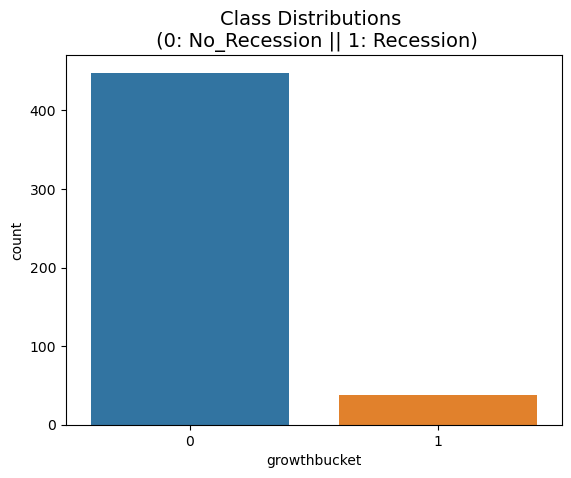

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the correct parameter 'data' to pass the data frame
sns.countplot(x='growthbucket', data=df)
plt.title('Class Distributions \n (0: No_Recession || 1: Recession)', fontsize=14)
plt.show()

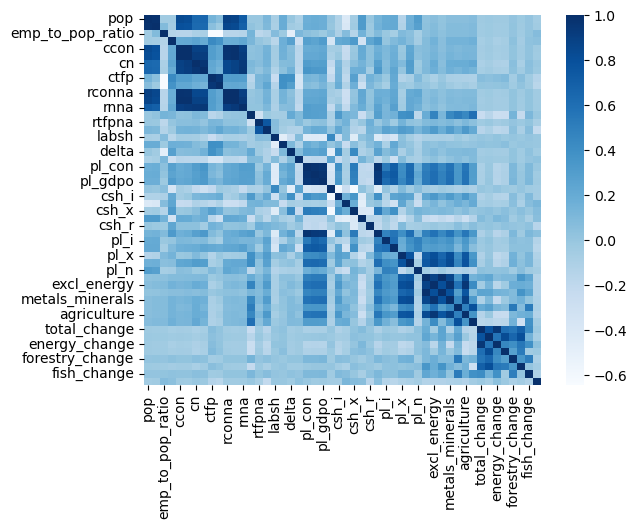

In [8]:
dfplot = sns.heatmap(df.corr(), cmap="Blues") 
plt.show() 

In [9]:
X = df.drop("growthbucket", axis=1)
y = df['growthbucket']

In [10]:
X

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,...,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,4.265433e+05,0.009374,0.648979,0.626111,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,8.046022e+05,0.019658,0.719390,0.657543,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,6.707259e+04,0.001670,0.308652,0.292607,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5.790397e+03,0.000184,0.205865,0.234643,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,1.690724e+04,0.000431,0.959765,0.993985,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,12.208407,6.215000,0.509075,1.837961,21853.750000,26727.062500,5.534759e+04,0.000896,0.234562,0.248461,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477
482,29.784193,15.389316,0.516694,1.467321,94663.101560,138279.359400,1.080252e+06,0.016209,0.337927,0.287038,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477
483,55.797787,25.301973,0.453458,1.689919,102405.859400,137377.593800,7.739462e+05,0.009984,0.259968,0.248847,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477
484,15.850567,5.277823,0.332974,1.579579,42087.269530,55202.140630,1.829390e+05,0.002542,0.470906,0.491789,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
481    0
482    1
483    0
484    0
485    0
Name: growthbucket, Length: 486, dtype: int64

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# Splitting the dataset
X = df.drop('growthbucket', axis=1)
y = df['growthbucket']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Example of MinMaxScaler usage
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Logistic Regression with class weights
model_LR = LogisticRegression(class_weight='balanced', random_state=42)
model_LR.fit(X_train_scaled, y_train)
y_pred_lr = model_LR.predict(X_test_scaled)

print("Logistic Regression with Class Weighting")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression with Class Weighting
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        90
           1       0.24      0.75      0.36         8

    accuracy                           0.79        98
   macro avg       0.61      0.77      0.62        98
weighted avg       0.91      0.79      0.83        98

[[71 19]
 [ 2  6]]


In [18]:
# Random Forest Classifier
model_RFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_RFC.fit(X_train_scaled, y_train)
y_pred_rfc = model_RFC.predict(X_test_scaled)

print("Random Forest with Class Weighting")
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

Random Forest with Class Weighting
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        90
           1       1.00      0.12      0.22         8

    accuracy                           0.93        98
   macro avg       0.96      0.56      0.59        98
weighted avg       0.93      0.93      0.90        98

[[90  0]
 [ 7  1]]


In [20]:
# One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
ocsvm.fit(X_train_scaled[y_train == 0])  # Train only on the majority class

y_pred_ocsvm = ocsvm.predict(X_test_scaled)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)  # Invert predictions
print("One-Class SVM")
print(classification_report(y_test, y_pred_ocsvm))
print(confusion_matrix(y_test, y_pred_ocsvm))

One-Class SVM
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        90
           1       0.17      0.12      0.14         8

    accuracy                           0.88        98
   macro avg       0.55      0.53      0.54        98
weighted avg       0.86      0.88      0.87        98

[[85  5]
 [ 7  1]]


In [21]:
# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on SMOTE data
model_LR_smote = LogisticRegression(random_state=42)
model_LR_smote.fit(X_train_smote, y_train_smote)
y_pred_smote_lr = model_LR_smote.predict(X_test_scaled)

print("Logistic Regression with SMOTE")
print(classification_report(y_test, y_pred_smote_lr))
print(confusion_matrix(y_test, y_pred_smote_lr))



Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        90
           1       0.24      0.62      0.34         8

    accuracy                           0.81        98
   macro avg       0.60      0.72      0.62        98
weighted avg       0.90      0.81      0.84        98

[[74 16]
 [ 3  5]]


In [22]:
# Adding interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Logistic Regression on polynomial features
model_LR_poly = LogisticRegression(random_state=42)
model_LR_poly.fit(X_train_poly, y_train)
y_pred_poly_lr = model_LR_poly.predict(X_test_poly)

print("Logistic Regression with Polynomial Features")
print(classification_report(y_test, y_pred_poly_lr))
print(confusion_matrix(y_test, y_pred_poly_lr))

Logistic Regression with Polynomial Features
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        90
           1       0.50      0.12      0.20         8

    accuracy                           0.92        98
   macro avg       0.71      0.56      0.58        98
weighted avg       0.89      0.92      0.90        98

[[89  1]
 [ 7  1]]


In [23]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)
    
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)

In [26]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
from sklearn.model_selection import GridSearchCV
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

clf_lsr_cv = GridSearchCV(model_LR,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7324299719887954


LogisticRegression(C=1000.0, random_state=42)
Accuracy :  0.9183673469387755 Recall :  0.0 F1 :  0.0


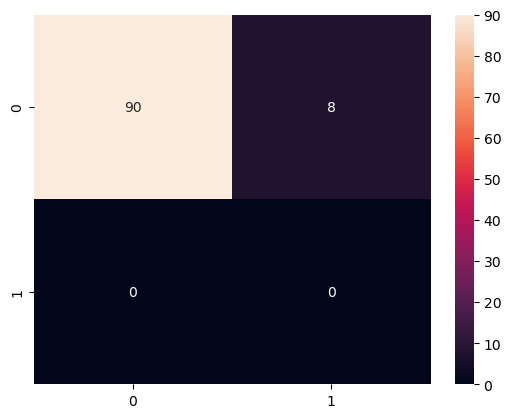

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
evaluate(lsr_clf)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

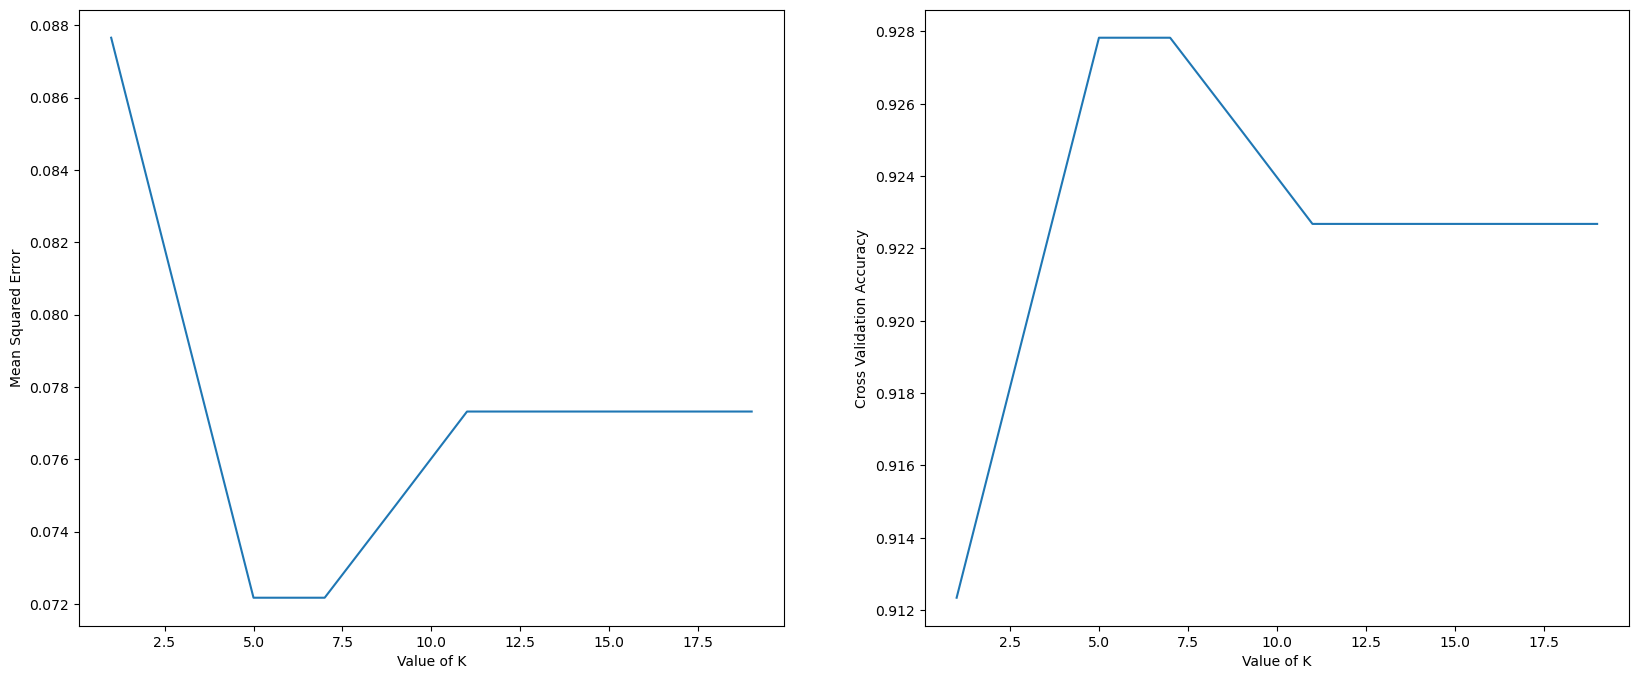

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

KNeighborsClassifier(n_neighbors=3)
Accuracy :  0.8673469387755102 Recall :  0.2222222222222222 F1 :  0.23529411764705882


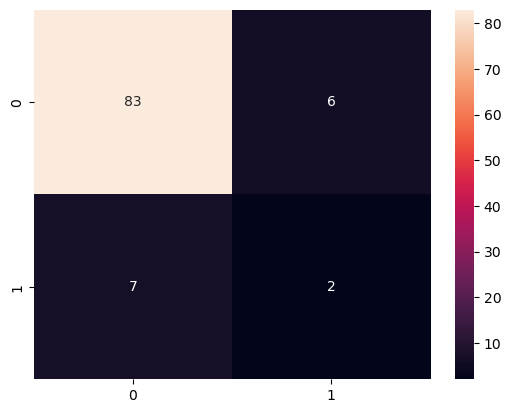

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
model_RFC = RandomForestClassifier()

# Fit the model
model_RFC.fit(X_train, y_train)

# Make predictions
predictions = model_RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9183673469387755


In [32]:
model_RFC = RandomForestClassifier()
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
clf_rfc_cv = GridSearchCV(model_RFC, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'n_estimators': 40}
accuracy : 0.7892344809598331


RandomForestClassifier(max_depth=9, n_estimators=50)
Accuracy :  0.9183673469387755 Recall :  0.5 F1 :  0.3333333333333333


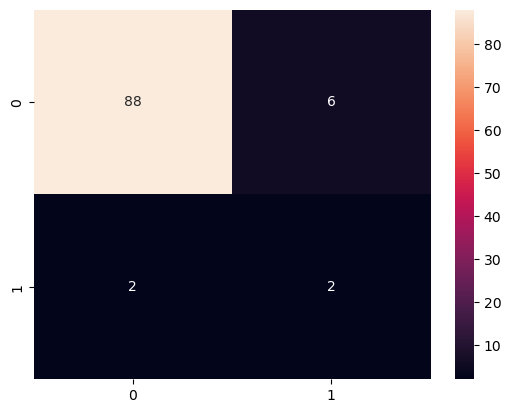

In [33]:
#Fitting model 

rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf)

In [34]:
pip install keras tensorflow

Note: you may need to restart the kernel to use updated packages.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model_ANN = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,273 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model_ANN.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.2035 - loss: 7405.5835 - val_accuracy: 0.7949 - val_loss: 850.9142
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7542 - loss: 607.9289 - val_accuracy: 0.9487 - val_loss: 55.3391
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9089 - loss: 449.2707 - val_accuracy: 0.9487 - val_loss: 58.8100
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8987 - loss: 660.2784 - val_accuracy: 0.9487 - val_loss: 54.0546
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9276 - loss: 325.8968 - val_accuracy: 0.9487 - val_loss: 44.5464
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9241 - loss: 267.9114 - val_accuracy: 0.9231 - val_loss: 28.6860
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8770 - loss: 100.1906 - val_accuracy: 0.8718 - val_loss: 168.5152
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8003 - loss: 84.9758 - val_accuracy: 

In [37]:
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

# Predict the labels using the model
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Print the classification report
print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        90
           1       0.00      0.00      0.00         8

    accuracy                           0.89        98
   macro avg       0.46      0.48      0.47        98
weighted avg       0.84      0.89      0.86        98



In [39]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.97      0.92      0.94        95\n           1       0.00      0.00      0.00         3\n\n    accuracy                           0.89        98\n   macro avg       0.48      0.46      0.47        98\nweighted avg       0.94      0.89      0.91        98\n'

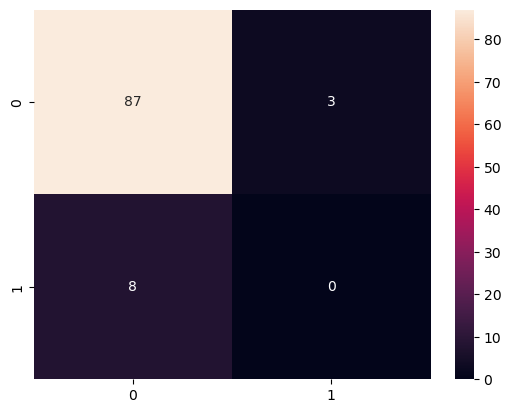

In [40]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [41]:
from sklearn.cluster import KMeans
# Importing the KMeans class from sklearn.cluster
from sklearn.cluster import KMeans

# Assuming X is already defined
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [42]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [43]:
X

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,...,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,4.265433e+05,0.009374,0.648979,0.626111,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,8.046022e+05,0.019658,0.719390,0.657543,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,6.707259e+04,0.001670,0.308652,0.292607,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5.790397e+03,0.000184,0.205865,0.234643,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,1.690724e+04,0.000431,0.959765,0.993985,...,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,12.208407,6.215000,0.509075,1.837961,21853.750000,26727.062500,5.534759e+04,0.000896,0.234562,0.248461,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477
482,29.784193,15.389316,0.516694,1.467321,94663.101560,138279.359400,1.080252e+06,0.016209,0.337927,0.287038,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477
483,55.797787,25.301973,0.453458,1.689919,102405.859400,137377.593800,7.739462e+05,0.009984,0.259968,0.248847,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477
484,15.850567,5.277823,0.332974,1.579579,42087.269530,55202.140630,1.829390e+05,0.002542,0.470906,0.491789,...,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477


In [44]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'No_Recession')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Recession')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

InvalidIndexError: (array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True]), 0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


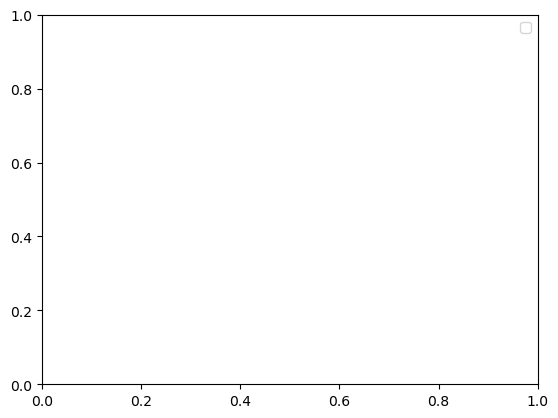

In [45]:
plt.legend()

In [46]:
#Algorithm 2
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('growthbucket', axis=1)
y = df['growthbucket']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
#Algorithmic Methods (Class Weighting and Ensemble Methods)
#Class Weighting with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Logistic Regression with class weights
model_LR = LogisticRegression(class_weight='balanced', random_state=42)
model_LR.fit(X_train, y_train)
y_pred_lr = model_LR.predict(X_test)

print("Logistic Regression with Class Weighting")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression with Class Weighting
              precision    recall  f1-score   support

           0       0.92      0.66      0.77        90
           1       0.09      0.38      0.14         8

    accuracy                           0.63        98
   macro avg       0.51      0.52      0.45        98
weighted avg       0.85      0.63      0.72        98

[[59 31]
 [ 5  3]]


In [48]:
#Ensemble Methods with RandomForest
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
model_RFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_RFC.fit(X_train, y_train)
y_pred_rfc = model_RFC.predict(X_test)

print("Random Forest with Class Weighting")
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

Random Forest with Class Weighting
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        90
           1       1.00      0.12      0.22         8

    accuracy                           0.93        98
   macro avg       0.96      0.56      0.59        98
weighted avg       0.93      0.93      0.90        98

[[90  0]
 [ 7  1]]


In [49]:
#One-Class SVM
from sklearn.svm import OneClassSVM

# One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
ocsvm.fit(X_train[y_train == 0])  # Train only on the majority class

y_pred_ocsvm = ocsvm.predict(X_test)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)  # Invert predictions

print("One-Class SVM")
print(classification_report(y_test, y_pred_ocsvm))
print(confusion_matrix(y_test, y_pred_ocsvm))

One-Class SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.08      1.00      0.15         8

    accuracy                           0.08        98
   macro avg       0.04      0.50      0.08        98
weighted avg       0.01      0.08      0.01        98

[[ 0 90]
 [ 0  8]]


In [50]:
#Cluster-Based Over Sampling with SMOTE

from imblearn.over_sampling import SMOTE

# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE data
model_LR_smote = LogisticRegression(random_state=42)
model_LR_smote.fit(X_train_smote, y_train_smote)
y_pred_smote_lr = model_LR_smote.predict(X_test)

print("Logistic Regression with SMOTE")
print(classification_report(y_test, y_pred_smote_lr))
print(confusion_matrix(y_test, y_pred_smote_lr))

Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        90
           1       0.07      0.25      0.11         8

    accuracy                           0.68        98
   macro avg       0.49      0.49      0.46        98
weighted avg       0.85      0.68      0.75        98

[[65 25]
 [ 6  2]]


In [51]:
from sklearn.preprocessing import PolynomialFeatures

# Adding interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Logistic Regression on polynomial features
model_LR_poly = LogisticRegression(random_state=42)
model_LR_poly.fit(X_train_poly, y_train)
y_pred_poly_lr = model_LR_poly.predict(X_test_poly)

print("Logistic Regression with Polynomial Features")
print(classification_report(y_test, y_pred_poly_lr))
print(confusion_matrix(y_test, y_pred_poly_lr))

Logistic Regression with Polynomial Features
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        90
           1       0.00      0.00      0.00         8

    accuracy                           0.92        98
   macro avg       0.46      0.50      0.48        98
weighted avg       0.84      0.92      0.88        98

[[90  0]
 [ 8  0]]
